In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For cleaner plots
sns.set(style='whitegrid')

In [14]:
df = pd.read_csv("C:/Users/jasmi/Downloads/Jasmithareddy_data_cleaned_preprocessed.csv") 
print(df.head())
print(df.info())

   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0  7319483.0  Airline D            475.0      Airport 3           Airport 2   
1  4791965.0  Airline E            538.0      Airport 5           Airport 4   
2  2991718.0  Airline C            565.0      Airport 1           Airport 2   
3  4220106.0  Airline E            658.0      Airport 5           Airport 3   
4  2263008.0  Airline E            566.0      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                       4.0          6.0    1.0        Type C       0.225122   
1                      12.0          1.0    6.0        Type B       0.060346   
2                      17.0          3.0    9.0        Type C       0.093920   
3                       1.0          1.0    8.0        Type B       0.656750   
4                      19.0          7.0   12.0        Type E       0.505211   

   Previous_Flight_Delay_Minutes  Airline_Ra

In [15]:
# Statistical summary
print(df.describe())

# Check for missing values
print(df.isnull().sum())


          Flight ID  Flight_Distance  Scheduled_Departure_Time  Day_of_Week  \
count  3.220000e+03      3220.000000               3220.000000  3220.000000   
mean   4.997429e+06       498.909333                 11.435000     3.963000   
std    2.768394e+06        95.453108                  6.659362     1.946224   
min    3.681000e+03       138.000000                  0.000000     1.000000   
25%    2.691718e+06       436.000000                  6.000000     2.000000   
50%    4.997429e+06       498.909333                 11.435000     4.000000   
75%    7.269202e+06       560.000000                 17.000000     6.000000   
max    9.999011e+06       864.000000                 23.000000     7.000000   

             Month  Weather_Score  Previous_Flight_Delay_Minutes  \
count  3220.000000    3220.000000                    3220.000000   
mean      6.381000       0.524023                      26.793383   
std       3.353165       0.280585                      26.905338   
min       1.0000

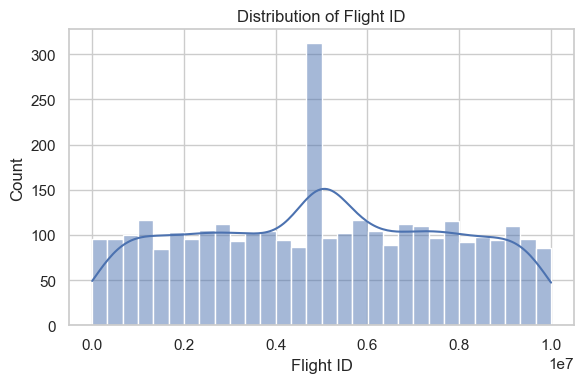

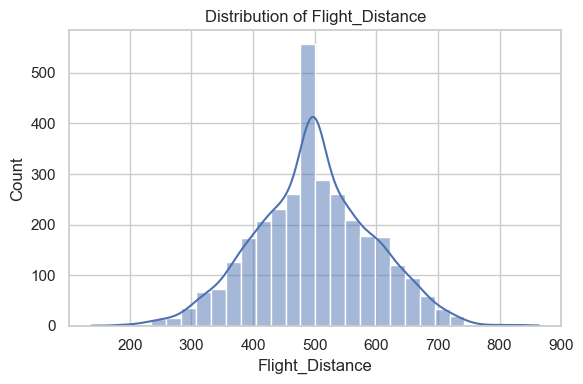

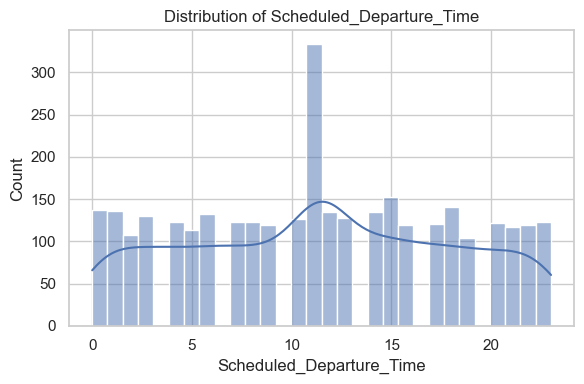

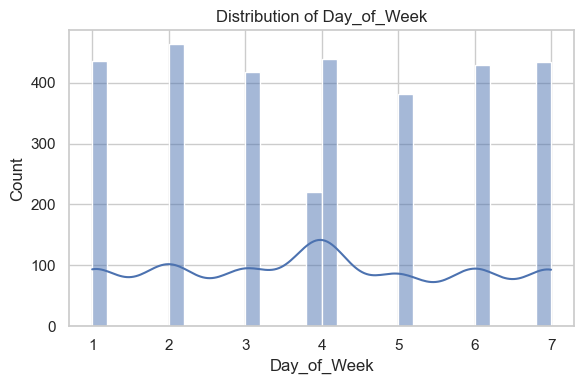

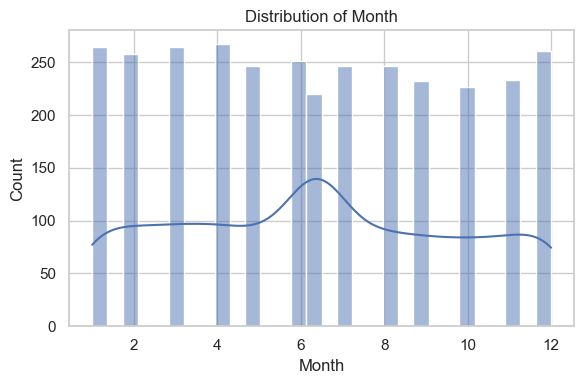

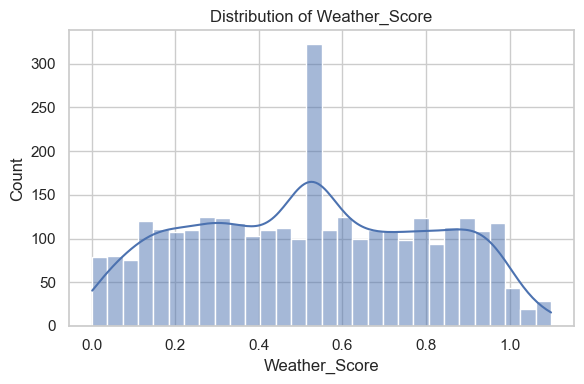

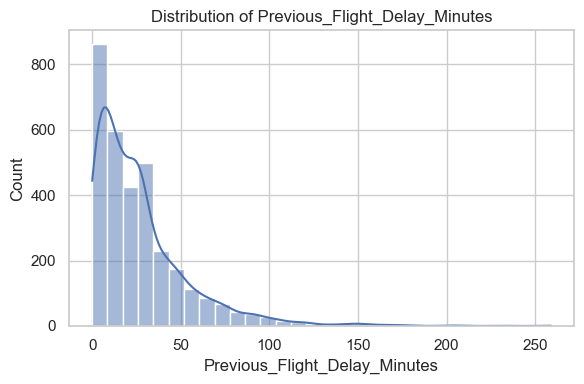

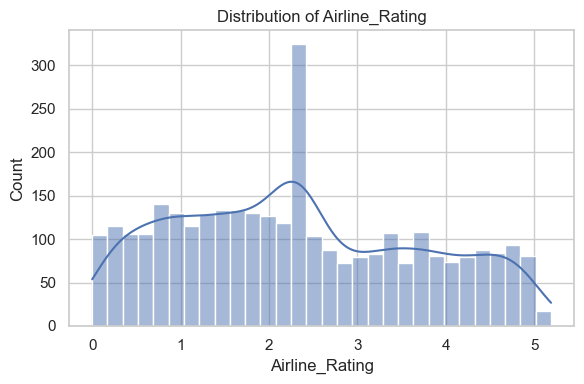

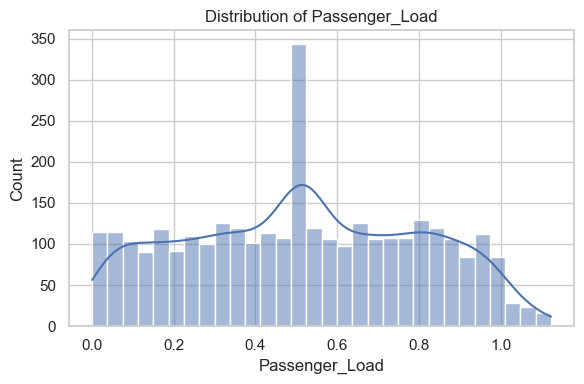

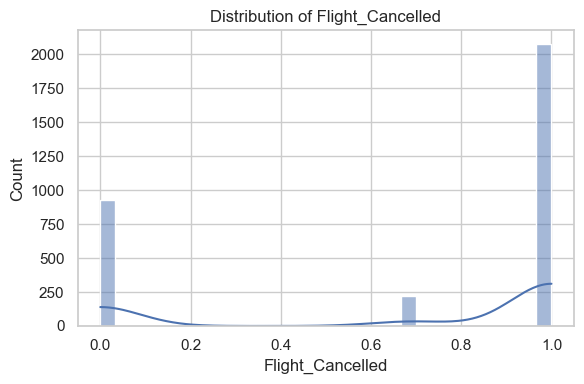

In [16]:
# Histogram for each numerical column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


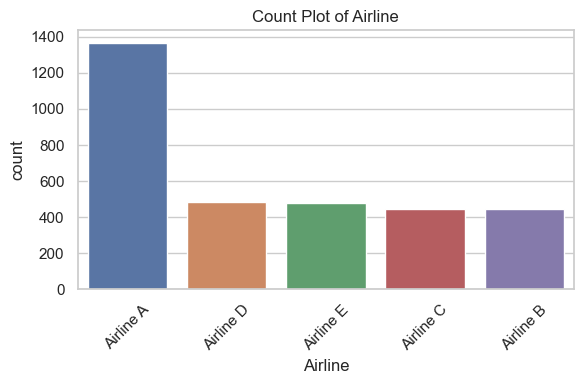

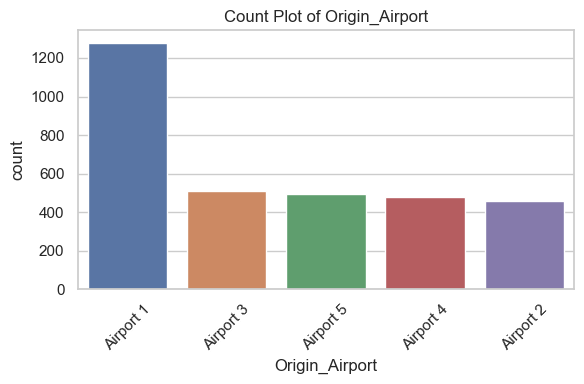

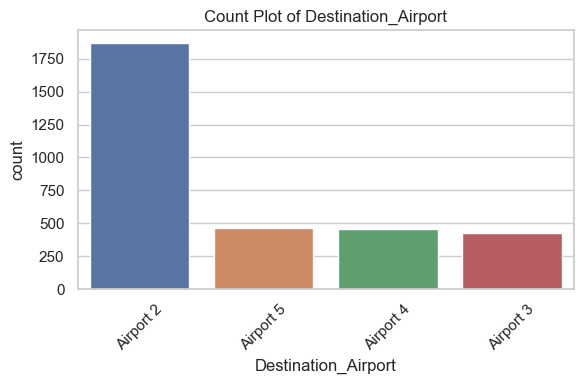

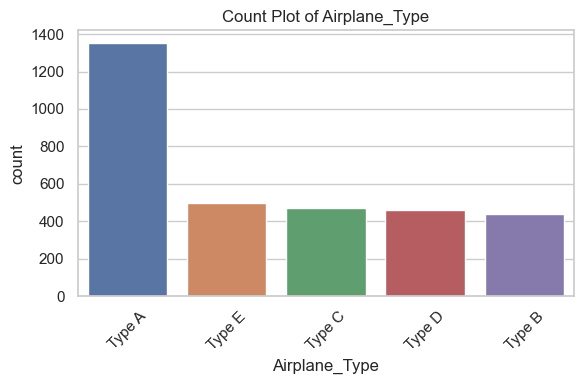

In [17]:
# Count plot for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


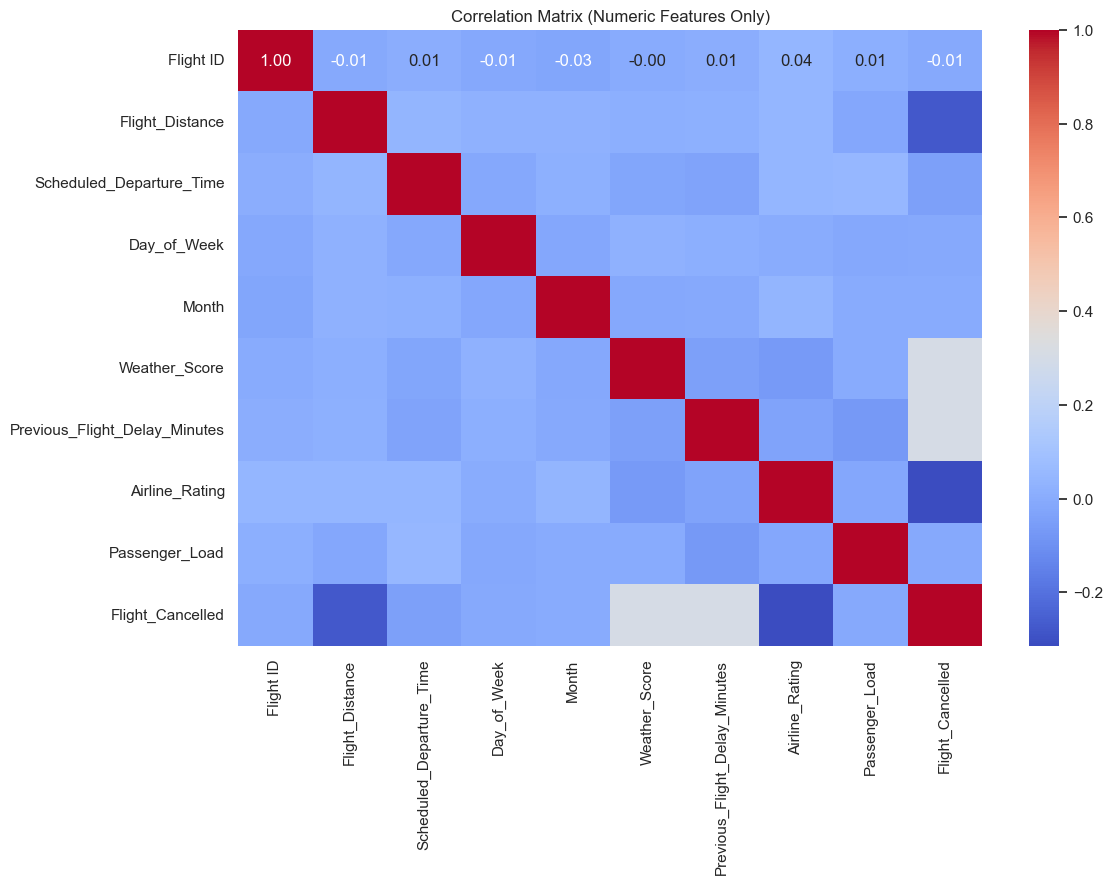

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: replace inf/-inf with NaN to avoid warnings/errors
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
numeric_df.dropna(inplace=True)

# Create the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

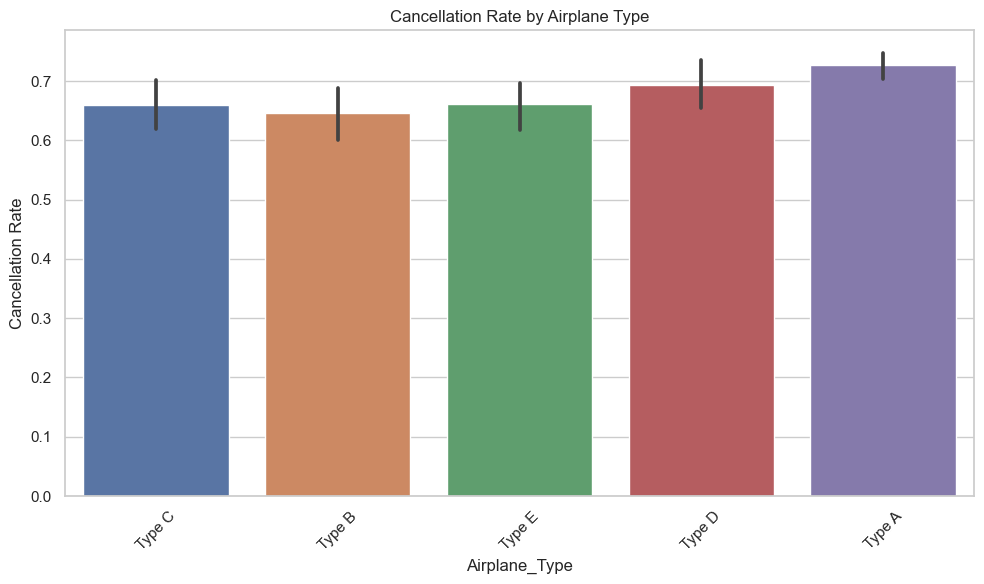

In [30]:
# Example: cancellation rate by Airplane Type
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Airplane_Type', y='Flight_Cancelled')
plt.title('Cancellation Rate by Airplane Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

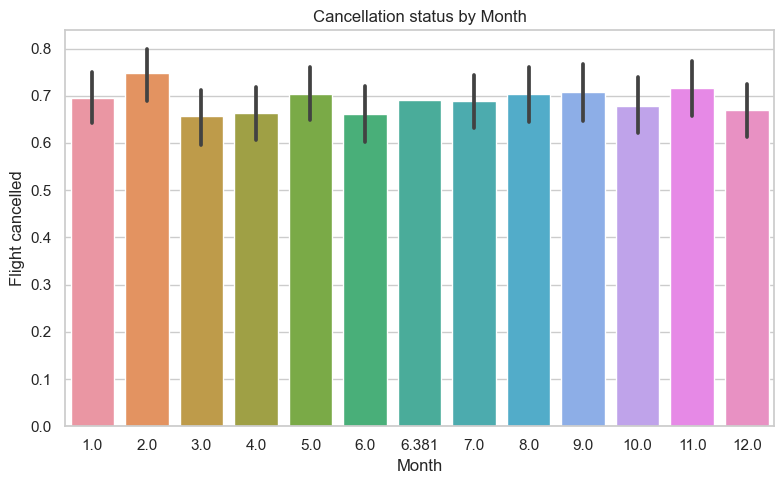

In [34]:
# Boxplot: Airline_Rating vs cancellation
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Month', y='Flight_Cancelled')
plt.title('Cancellation status by Month')
plt.xlabel('Month')
plt.ylabel('Flight cancelled')
plt.tight_layout()
plt.show()
